<a href="https://colab.research.google.com/github/rafidddeshmukh/EDA-Hotel_Booking/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [56]:
#Import pakages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
#load the csv file of hotel booking data
path="/content/drive/MyDrive/EDA - Hotel Booking /Hotel Bookings.csv" 
df_hotel = pd.read_csv(path)


In [59]:
#Copy the data in df
df = df_hotel.copy()

## Exploring Data

In [60]:
#reading dataframe top 5 rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [61]:
#checking shape of dataframe
df.shape

(119390, 32)

In [62]:
#reading last 5 rows of dataframe
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


###Info

In [63]:
#getting datafame information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Descriptive Statastics

In [64]:
#getting Descriptive Statastics information of dataframe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#Checking For missing value and Dealing with it

In [65]:
#checking for null value in dataframe , sum it and arrange it high to low and get only top 5 result
df.isnull().sum().sort_values(ascending=False)[:5]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
dtype: int64

In [66]:
#counting value in country column for getting higest booking country wise
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [67]:
#Filling null value with others in country column
df['country'].fillna('other',inplace=True)

In [68]:
#checking for null value in dataframe , sum it and arrange it high to low and get only top 5 result
df.isnull().sum().sort_values(ascending=False)[:5]

company                   112593
agent                      16340
children                       4
hotel                          0
previous_cancellations         0
dtype: int64

In [69]:
#Fill null value in company, agent and in children with 0
df['agent'].fillna(0,inplace=True)
df['company'].fillna(0,inplace=True)
df['children'].fillna(0,inplace=True)

In [70]:
#checking for null value in dataframe , sum it and arrange it high to low and get only top 5 result
df.isnull().sum().sort_values(ascending=False)[:5]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

In [71]:
## Drop the row there is no adult, babies and children
df=df.drop(df[(df.adults+df.babies+df.children)==0].index)

###Coverting dtype

In [72]:
#Converting dtype of agent, company and children from float to int
df['children']=df['children'].astype('int64')
df['company']=df['company'].astype('int64')
df['agent']=df['agent'].astype('int64')

In [73]:
#getting datafame information 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  int64  
 11  babies                          119210 non-null  int64  
 12  meal            

### checking for duplicate values 

In [74]:
#getting duplicate value
df[df.duplicated()].shape

(31980, 32)

In [75]:
#Drop duplicte values in dataframe
df=df.drop_duplicates()

In [76]:
#checking shape of dataframe
df.shape

(87230, 32)

###Columns

In [77]:
#to get the list of columns in dataframe
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

##Data Visualization

###1.Hotels
First we will check which type of hotel booked most and 
we will plot pie chart for hotels in hotel there is only two types City hotel and Resort hotel

In [78]:
#getting unique value of hotel
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [79]:
#Checking which hotel type have most booking 
df['hotel'].value_counts()

City Hotel      53274
Resort Hotel    33956
Name: hotel, dtype: int64

Text(0.5, 1.0, 'Hotel')

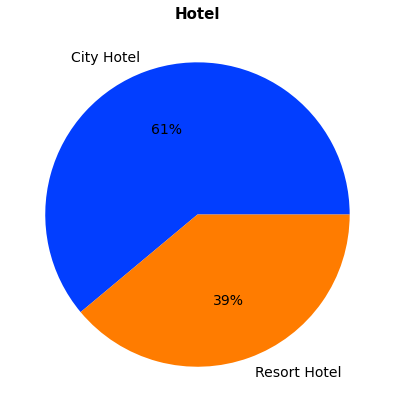

In [80]:
#for bright colour for pie chart
palette_color = sns.color_palette('bright') 
hotel=df['hotel'].value_counts()

#setting figure size
plt.figure(figsize=(14,7))

#Plotting pie chart for better understanding from seaborn
pie=plt.pie(hotel, labels=hotel.index, colors=palette_color,
         autopct='%.0f%%',textprops={'fontsize': 14})

#setting title for plot
plt.title('Hotel',fontsize= 15,fontweight='bold')


From this we can see that most people prefer City Hotel(61%) over Resort Hotel(39%)

###2. Cancelled Booking

Checking cancelled booking in this column there is two unique value 0(No) and 1(Yes) for both hotel type

In [81]:
 #getting unique value 
 df['is_canceled'].unique()

array([0, 1])

Text(0.5, 1.0, 'Cancelation')

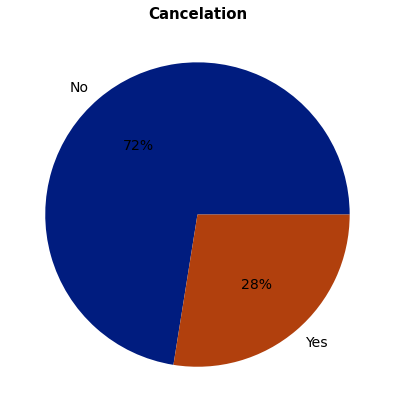

In [82]:
#for bright colour for pie chart
palette_color = sns.color_palette('dark')
cancel=df['is_canceled'].value_counts()

#setting figure size
plt.figure(figsize=(14,7))

# Plotting pie chart for cancelled booking
pie=plt.pie(cancel, labels=['No','Yes'], colors=palette_color,
         autopct='%.0f%%',textprops={'fontsize': 14})

#setting title for plot
plt.title('Cancelation',fontsize= 15,fontweight='bold')




From above as we can see 28% booking were cancelled in total booking

###Checking hotel wise cancelled booking

In [83]:
#hote wise total cancellation
hotel_wise = df[df['is_canceled']==1]
hotel_wise['hotel'].value_counts()

City Hotel      16035
Resort Hotel     7974
Name: hotel, dtype: int64

In [84]:
#hotel wise total booking
df['hotel'].value_counts()

City Hotel      53274
Resort Hotel    33956
Name: hotel, dtype: int64

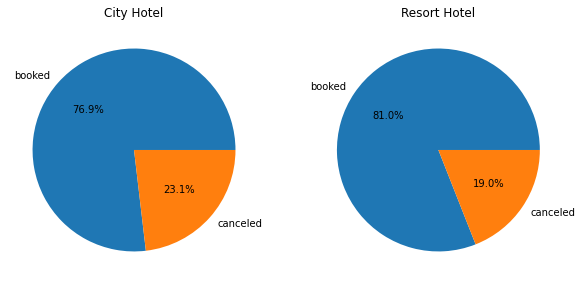

In [85]:
#setting figure size and plotting subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
data_city_hotel=[53274,16035]
label =['booked','canceled']

#plotting pie chart of hotel wise booking cancellation
ax1.pie(data_city_hotel, labels=label, autopct='%1.1f%%')
data_resort_hotel=[33956,7974]

#setting title for subplot
ax1.title.set_text('City Hotel')
a=ax2.pie(data_resort_hotel, labels=label, autopct='%1.1f%%') 

#setting title for subplot 
ax2.title.set_text('Resort Hotel')

From above we ca can conclude that city hotel(23%) have more cancellation than resort hotel(19%) but diffrence in not big acording to there total booking

In [86]:
#cancelled booking removed
df_new=df[df['is_canceled']==0]

##3. Year wise Booking

In [87]:
#checking number of booking year wise
df_new['arrival_date_year'].value_counts()

2016    31113
2017    21527
2015    10581
Name: arrival_date_year, dtype: int64

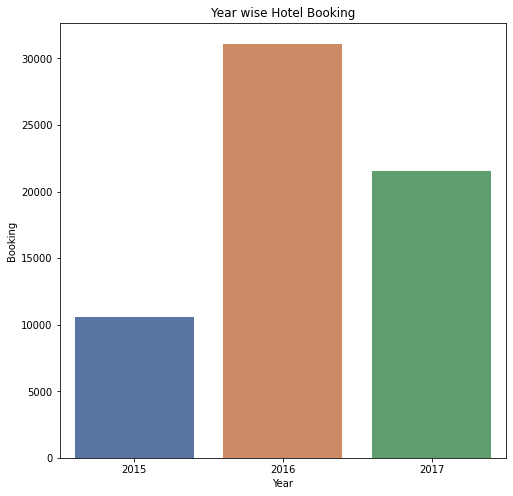

In [88]:
#setting figure size
plt.figure(figsize=(8,8))

#Ploting countplot for year wise booking
sns.countplot(x=df_new['arrival_date_year'], palette='deep')

#setting labels for x and y and set title for countplot
plt.xlabel('Year')
plt.ylabel('Booking')
plt.title("Year wise Hotel Booking")

#display the plot
plt.show()

Here we have three year booking data from 2015 to 2017 in which 2015 have lowest booking and 2016 have highest booking.

##4.Month Wise Booking

In [89]:
#Checking which month have most booking
df_new['arrival_date_month'].value_counts()

August       7620
July         6847
May          5902
March        5660
April        5494
June         5403
October      5279
September    5041
February     4671
November     3921
December     3735
January      3648
Name: arrival_date_month, dtype: int64

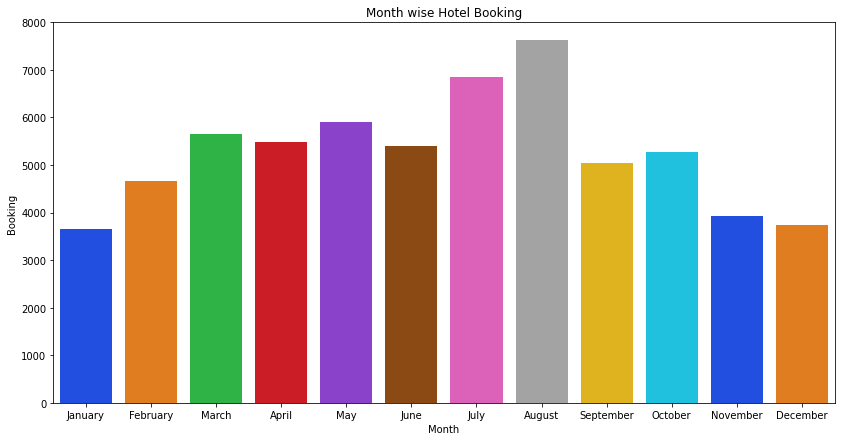

In [117]:
#setting figure size
plt.figure(figsize=(14,7))
od=['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
#plotting countplot for month wise booking
sns.countplot(x=df_new['arrival_date_month'],order=od, palette='bright')

#setting labels for x and y and set title for countplot
plt.xlabel('Month')
plt.ylabel('Booking')
plt.title("Month wise Hotel Booking")

#Display the plot
plt.show()

From above plot we can see that august month is the busiest and january have lowest booking so from sptember to february have low booking and from march to august there is increse in booking 

###Days in waiting list

In [91]:
#checking waiting days for booking
from pandas.core.base import value_counts
df_new['days_in_waiting_list'].value_counts(normalize=True)

0      0.991126
63     0.000712
87     0.000364
58     0.000332
122    0.000285
         ...   
100    0.000016
37     0.000016
109    0.000016
93     0.000016
23     0.000016
Name: days_in_waiting_list, Length: 97, dtype: float64

from above we can see that waiting for booing is almost 0 days(99%).

###Country
checking which country most no of booking

In [92]:
#Creating new dataframe for country and most no booking
c_data= df_new['country'].value_counts().reset_index()[:20]
c_data.columns =['country','no_of_booking']
c_data

,country,no_of_booking
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
5,IRL,2347
6,ITA,1986
7,BEL,1670
8,NLD,1560
9,USA,1412


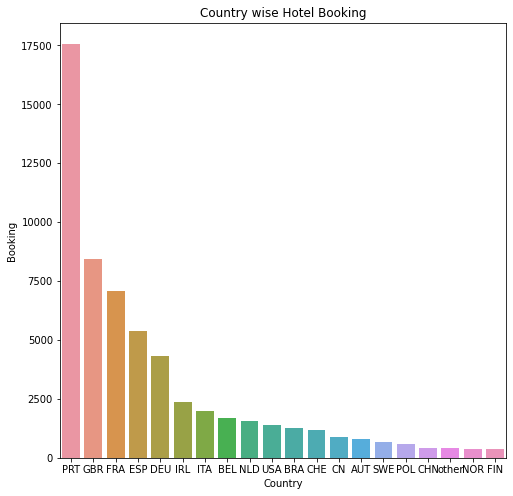

In [93]:
#setting figure size
plt.figure(figsize=(8,8))

#Ploting barplot for country wise booking
sns.barplot(x=c_data['country'],y=c_data['no_of_booking'])

#setting labels for x and y and set title for countplot
plt.xlabel('Country')
plt.ylabel('Booking')
plt.title("Country wise Hotel Booking")

#display the plot
plt.show()

Most of the guest are from Portugal(PRT) and second ccountry is UK(GBR) and other country

###Month and hotel wise ADR(Average Daily Rate)

Checking hotel rate month and hotel wise for better understanding and deciding which time of year is better for booking

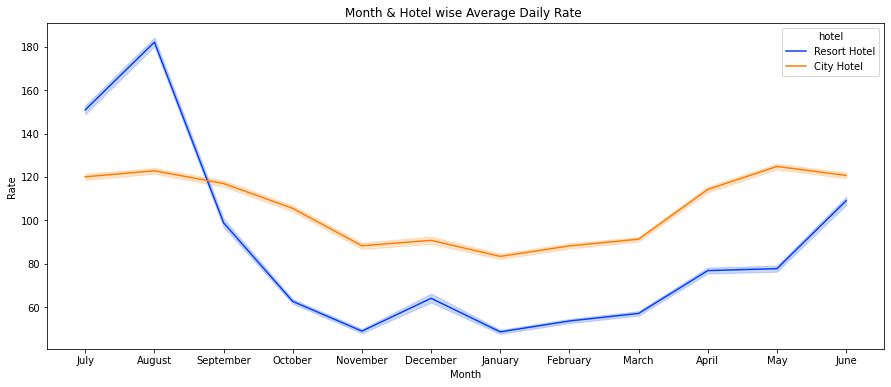

In [116]:
#setting figure size
plt.figure(figsize=(15,6))

#Plotting lineplot for ADR acording to month
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df_new,
             palette='bright')

#setting labels for x and y and set title for lineplot
plt.xlabel('Month')
plt.ylabel('Rate')
plt.title("Month & Hotel wise Average Daily Rate ")

#Display the plot
plt.show()

Resort hotel and city hotel have highest rate in august in januray both hotel have lowest rate. Resort Hotel is pricier than city hotel and Prices of city hotel do not fluctuate that much.
From this we can conclude that from november to march hotel rate are low and also have low booking rate this months are best time of year for booking.
January is best Month for hotel booking 

##5.Stay

we will get total stay by adding stays in weekend nights and stays in week nights and check there daily rate

In [95]:
#Creating new column total nights stayed
df_new['total_nights']= df_new['stays_in_weekend_nights']+df_new['stays_in_week_nights']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


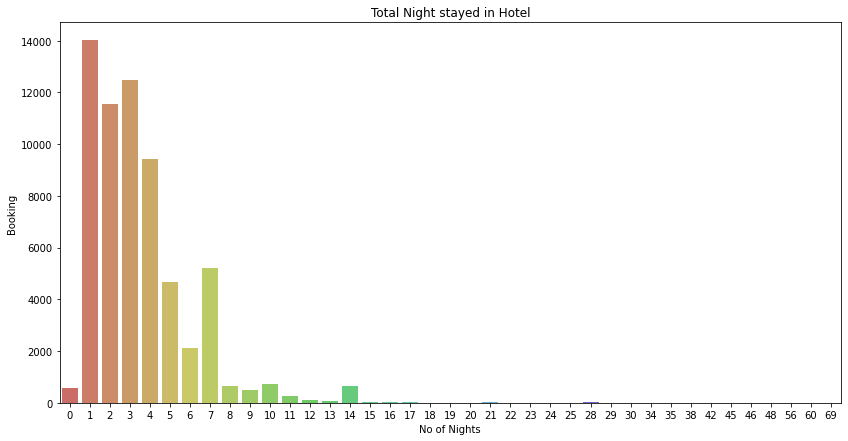

In [96]:
#setting figure size
plt.figure(figsize=(14,7))

#plotting countplot for total night stayed
sns.countplot(x=df_new['total_nights'], palette='hls')

#setting labels for x and y and set title for countplot
plt.xlabel('No of Nights')
plt.ylabel('Booking')
plt.title("Total Night stayed in Hotel")

#Display the plot
plt.show()

From plot we can conclude that max no of booking made for one night and after that for 3 nights and 2 nights respectively.

###Droping the outlier

In [97]:
# taking only total nights which are less than 16
df_new1 = df_new[df_new['total_nights']<16]

In [98]:
#droping zero nights
df_new1 = df_new1[df_new1['total_nights']!=0]

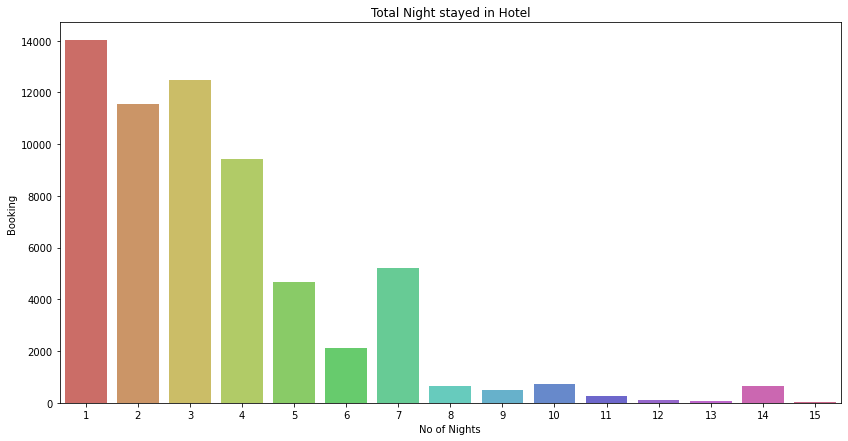

In [99]:
#setting figure size
plt.figure(figsize=(14,7))

#plotting countplot for total night stayed
sns.countplot(x=df_new1['total_nights'], palette='hls')

#setting labels for x and y and set title for countplot
plt.xlabel('No of Nights')
plt.ylabel('Booking')
plt.title("Total Night stayed in Hotel")

#Display the plot
plt.show()

In [100]:
#creating new column for total aveage rate 
df_new1['ar_total'] = df_new1['total_nights']*df_new1['adr']

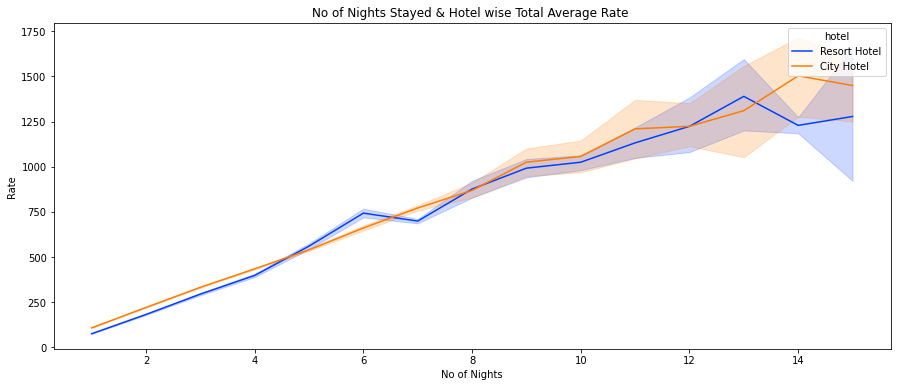

In [101]:
#setting figure size
plt.figure(figsize=(15,6))

#Plotting lineplot for Total AR acording to no of nights stayed
sns.lineplot(x='total_nights', y='ar_total', hue='hotel', data= df_new1,
             palette='bright')

#setting labels for x and y and set title for lineplot
plt.xlabel('No of Nights')
plt.ylabel('Rate')
plt.title("No of Nights Stayed & Hotel wise Total Average Rate ")

#Display the plot
plt.show()

From above we can see that as increse in total night stayed so average rate also increse so to get the best deal you have to book when booking is low in hotel as we see above that january month have low average daily rate for booking

##6. Special Requests
Checking special request for predicting when you will get more special request

In [102]:
#checking unique value
df_new['total_of_special_requests'].unique()

array([0, 1, 3, 2, 4, 5])

In [103]:
#value counts for each counts
df_new['total_of_special_requests'].value_counts()

0    29228
1    22475
2     9280
3     1918
4      286
5       34
Name: total_of_special_requests, dtype: int64

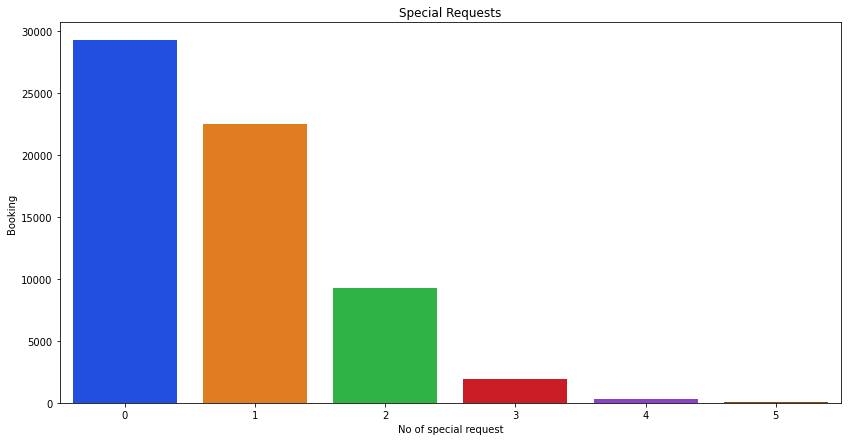

In [104]:
#setting figure size
plt.figure(figsize=(14,7))

#plotting countplot for special requests
sns.countplot(x=df_new['total_of_special_requests'], palette='bright')

#setting labels for x and y and set title for countplot
plt.xlabel('No of special request')
plt.ylabel('Booking')
plt.title("Special Requests")

#Display the plot
plt.show()

###Month Wise Sepecial Request

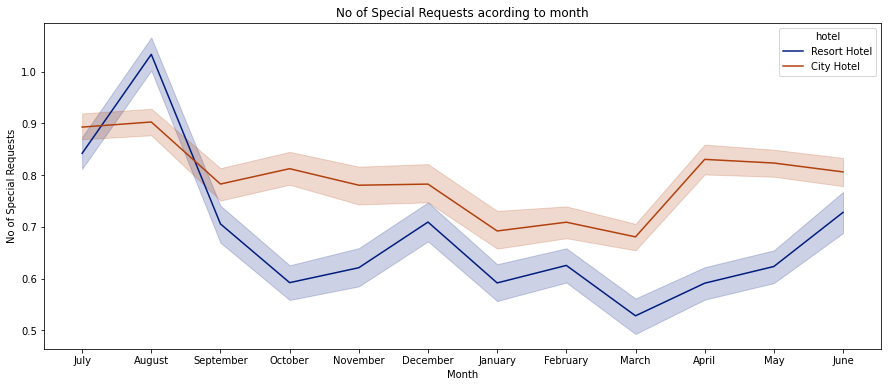

In [105]:
#setting figure size
plt.figure(figsize=(15,6))

#Plotting lineplot for Special Requests acording to month
sns.lineplot(x='arrival_date_month', y='total_of_special_requests', hue='hotel', data= df_new,
             palette='dark')

#setting labels for x and y and set title for lineplot
plt.xlabel('Month')
plt.ylabel('No of Special Requests')
plt.title("No of Special Requests acording to month")

#Display the plot
plt.show()

From above we can see that august have number of special request so we can conclude that whwn no of booking increses so special request increses in this march month have lowest no of specail request

In [106]:
list(df_new.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date',
 'total_nights']